### Machine learning - Time Series - SARIMA

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math

In [3]:
df = pd.read_csv("data/Call_Setup_Success_Rate_1month_hourly.csv", sep = '$')

In [4]:
df.head()

,kpi,unit,kpi_id,ne_date,ne_hour,ne_id,value
0,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTLAMSS1,90.32
1,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXTIJMSS1,94.90
2,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS1,90.34
3,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXMTYMSS2,92.85
4,Call Setup Success Rate,%,3561851598725308,2018-10-01,0,MEXGDLMSS1,90.17


In [5]:
df.isnull().sum()

kpi        0
unit       0
kpi_id     0
ne_date    0
ne_hour    0
ne_id      0
value      0
dtype: int64

#### List of Network Element IDs

In [6]:
df.ne_id.unique()

array(['MEXTLAMSS1', 'MEXTIJMSS1', 'MEXMTYMSS1', 'MEXMTYMSS2',
       'MEXGDLMSS1'], dtype=object)

## 1. NE_ID = MEXTLAMSS1

In [7]:
df1 = df.loc[df["ne_id"] == "MEXTLAMSS1" ].drop(columns = ["kpi_id", "kpi", "unit", "ne_id"]).reset_index().drop(columns = "index")

Combining date and hours into a timestamp

In [8]:
df1["ne_ts"] = pd.to_datetime(df1["ne_date"] + "-" + df1["ne_hour"].astype("str"), format="%Y-%m-%d-%H")
df1 = df1.drop(columns = ["ne_date", "ne_hour"])
df1 = df1.set_index("ne_ts")

In [9]:
df1.head()

,value
ne_ts,
2018-10-01 00:00:00,90.32
2018-10-01 01:00:00,92.33
2018-10-01 02:00:00,92.45
2018-10-01 03:00:00,92.33
2018-10-01 04:00:00,90.24


Plotting the graph

/home/maran/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


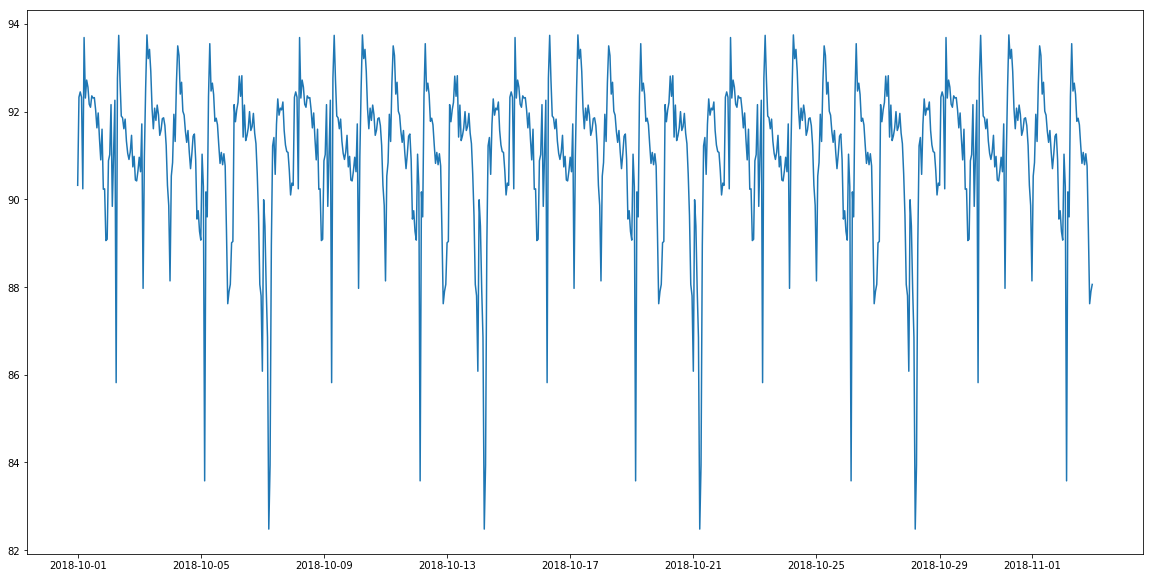

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df1.index, df1.value)

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

Plot trend, seasonal and residual

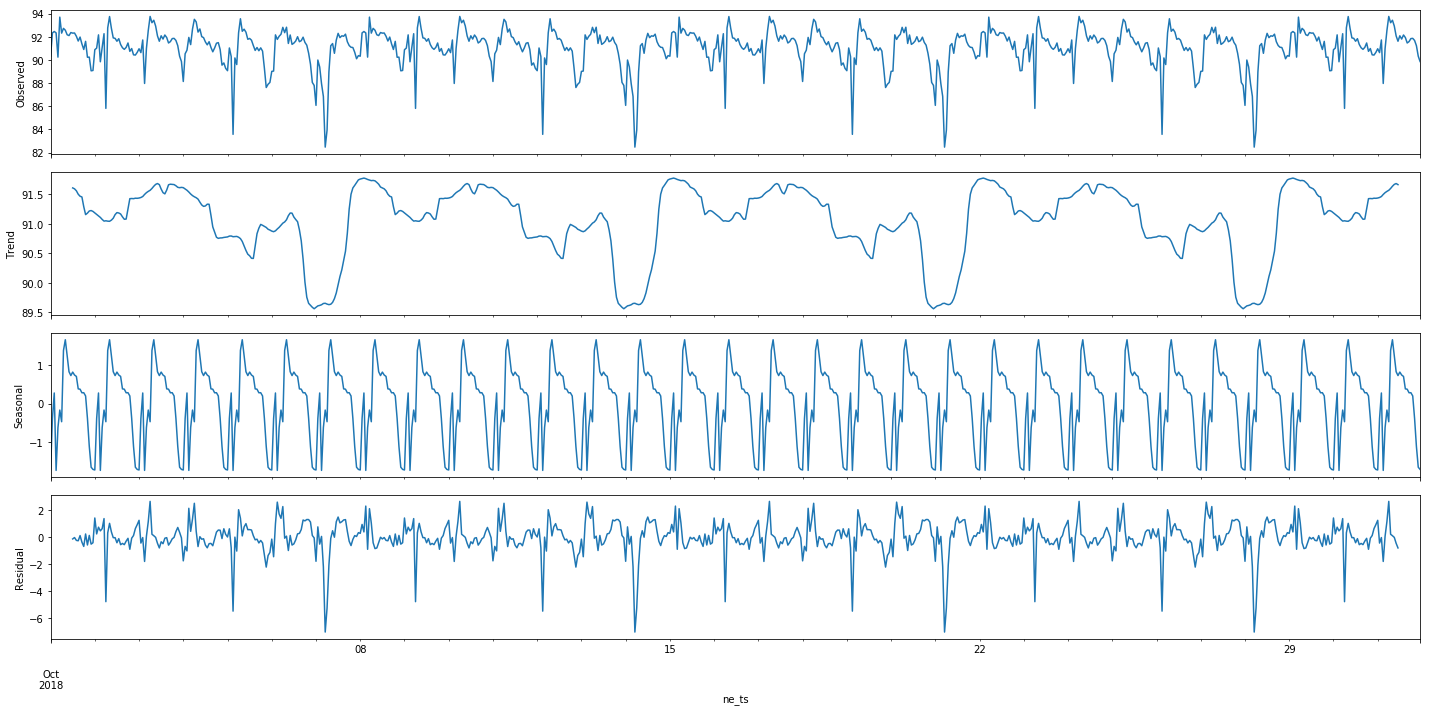

In [12]:
train = df1['2018-10']
test = df1['2018-11']

decomposition = sm.tsa.seasonal_decompose(train, model='add')
fig = decomposition.plot()
plt.show()

### Baseline RMSE

Forecasting average of all values in train for 48 instances

In [13]:
np.sqrt(mean_squared_error([np.mean(train)]*48, test))

1.7741045707160505

## SARIMA

In [14]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

In [15]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7336      0.049     15.042      0.000       0.638       0.829
ma.L1         -1.2614      8.430     -0.150      0.881     -17.783      15.260
ma.L2          0.2614      2.198      0.119      0.905      -4.047       4.570
ar.S.L24      -1.1225      0.035    -32.251      0.000      -1.191      -1.054
ar.S.L48      -0.3482      0.026    -13.331      0.000      -0.399      -0.297
ma.S.L24   -1.093e-05    171.527  -6.37e-08      1.000    -336.186     336.186
ma.S.L48      -1.0000    188.528     -0.005      0.996    -370.508     368.508
sigma2         1.1069    208.456      0.005      0.996    -407.460     409.674


RMSE for Sarima

In [16]:
forecast = results.forecast(48)
np.sqrt(mean_squared_error(forecast[:48], test.values))

1.1249674025375238

In [48]:
def plot_forecasts(train, test, forecast):
    plt.figure(figsize=(15,10))
    plt.plot(train["2018-10-25":])
    plt.plot(test.index, forecast[:48])
    plt.plot(test)
    plt.legend(["Train","Forecast","Actual"], fontsize = 'x-large', loc = 1)

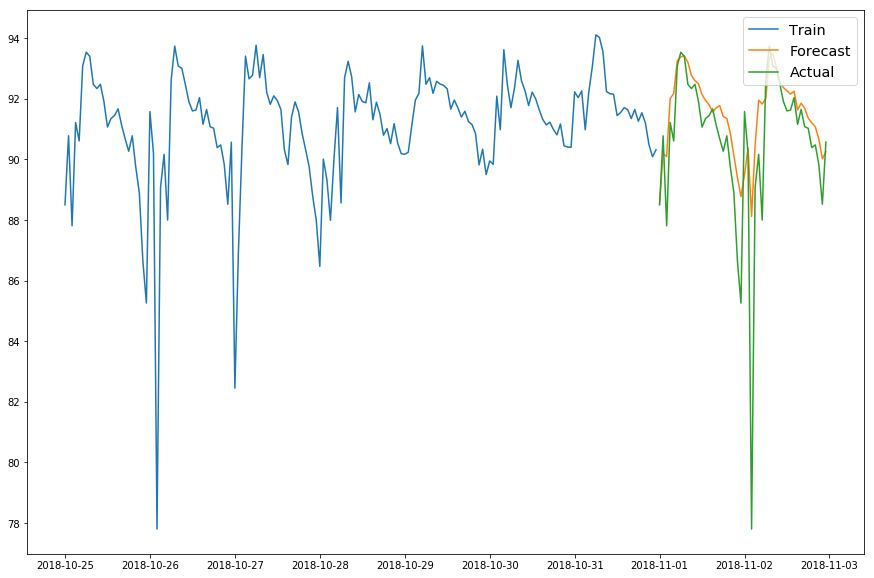

In [49]:
plot_forecasts(train, test, forecast)

## 2. NE_ID =  MEXTIJMSS1

In [19]:
df1 = df.loc[df["ne_id"] == "MEXTIJMSS1" ].drop(columns = ["kpi_id", "kpi", "unit", "ne_id"]).reset_index().drop(columns = "index")

df1["ne_ts"] = pd.to_datetime(df1["ne_date"] + "-" + df1["ne_hour"].astype("str"), format="%Y-%m-%d-%H")
df1 = df1.drop(columns = ["ne_date", "ne_hour"])
df1 = df1.set_index("ne_ts")

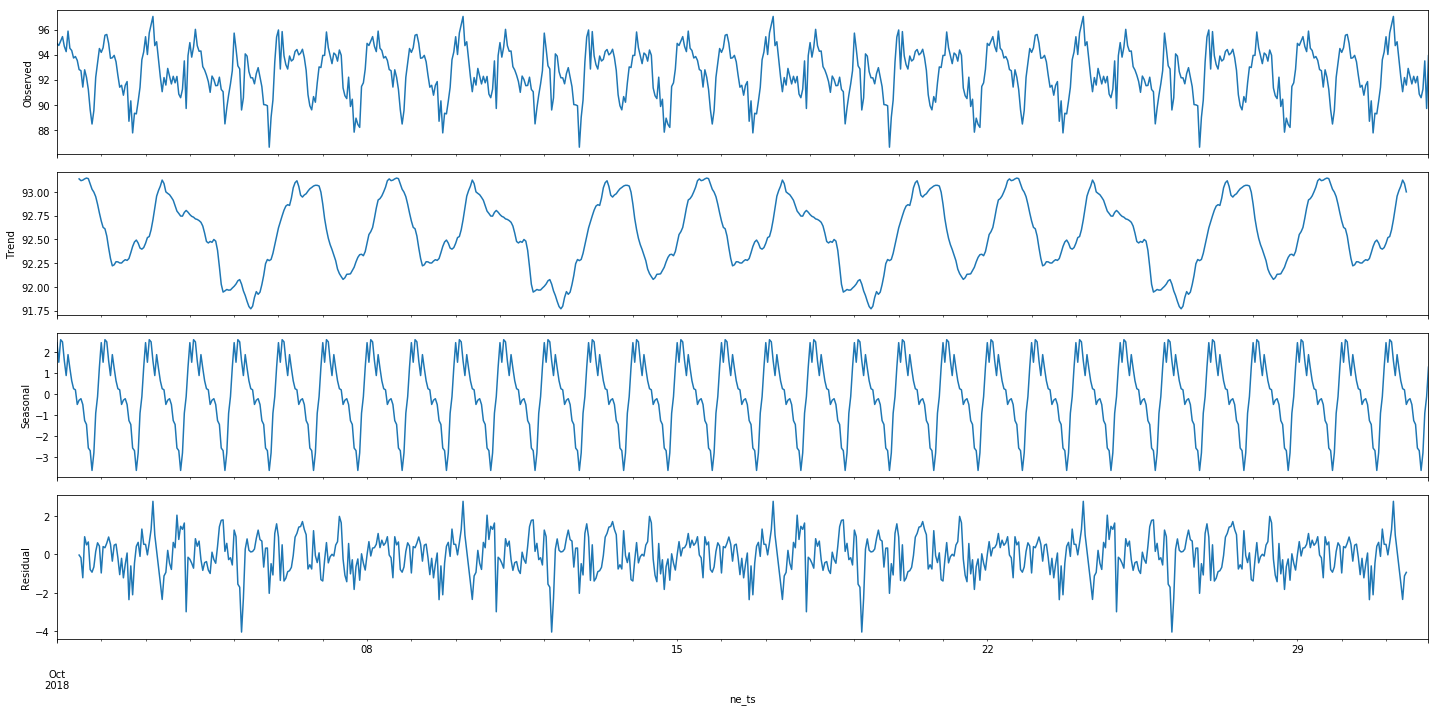

In [20]:
train = df1['2018-10']
test = df1['2018-11']

# Plot trend, seasonal and residual

decomposition = sm.tsa.seasonal_decompose(train, model='add')
fig = decomposition.plot()
plt.show()

### Baseline

In [21]:
np.sqrt(mean_squared_error([np.mean(train)]*48, test))

1.9828983877359105

In [22]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

RMSE

In [23]:
results = mod.fit()
forecast = results.forecast(48)
np.sqrt(mean_squared_error(forecast[:48], test.values))

1.0586696057362628

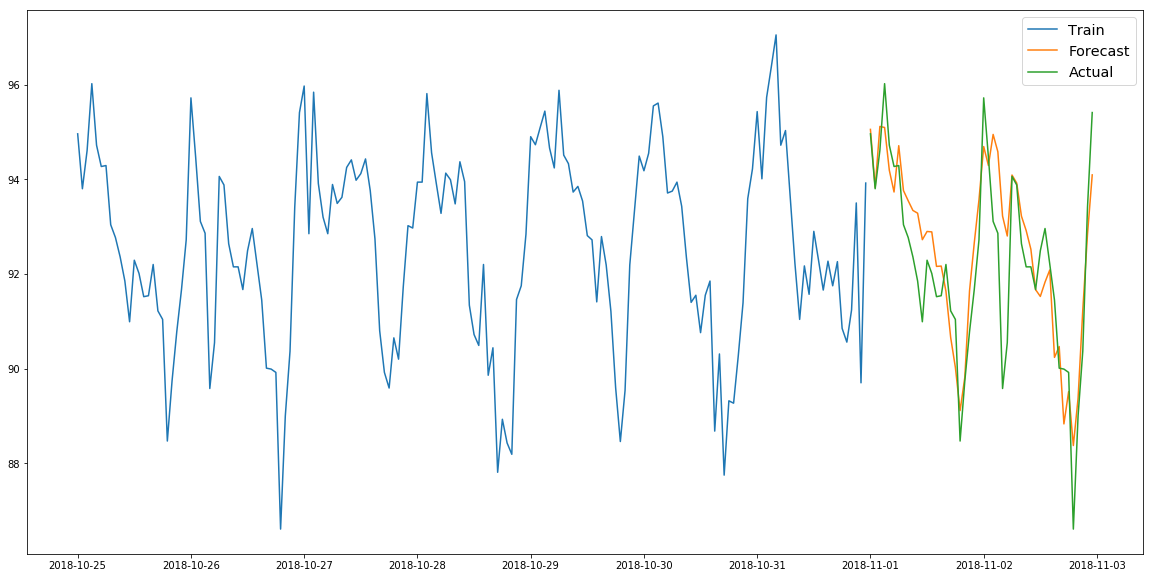

In [24]:
plot_forecasts(train, test, forecast)

## 3. NE_ID = MEXMTYMSS1

In [25]:
df1 = df.loc[df["ne_id"] == "MEXMTYMSS1" ].drop(columns = ["kpi_id", "kpi", "unit", "ne_id"]).reset_index().drop(columns = "index")

df1["ne_ts"] = pd.to_datetime(df1["ne_date"] + "-" + df1["ne_hour"].astype("str"), format="%Y-%m-%d-%H")
df1 = df1.drop(columns = ["ne_date", "ne_hour"])
df1 = df1.set_index("ne_ts")

<Figure size 1440x1080 with 0 Axes>

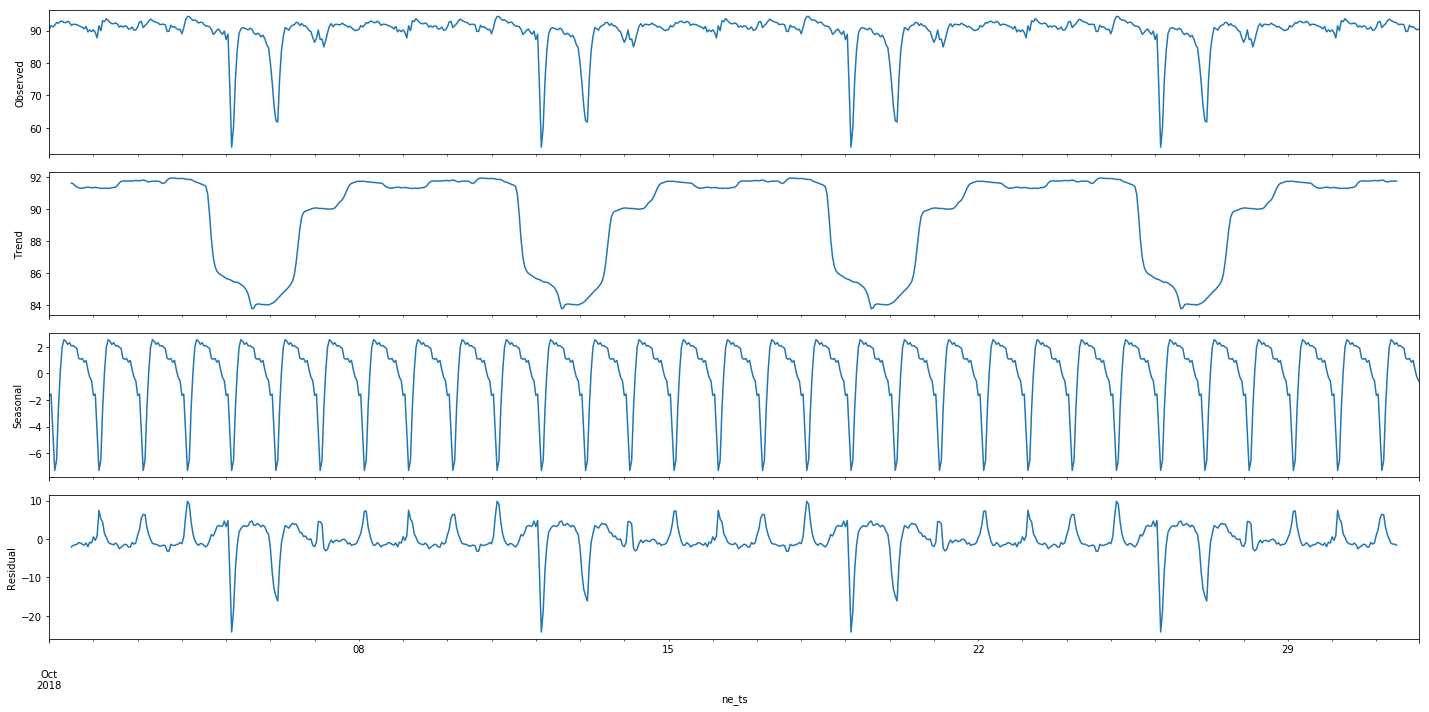

In [26]:
train = df1['2018-10']
test = df1['2018-11']

# Plot trend, seasonal and residual

decomposition = sm.tsa.seasonal_decompose(train, model='add')
plt.figure(figsize=(20,15))
fig = decomposition.plot()
plt.show()

### Baseline 

In [27]:
np.sqrt(mean_squared_error([np.mean(train)]*48, test))

7.793006812345306

In [28]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

RMSE

In [29]:
results = mod.fit()
forecast = results.forecast(48)
np.sqrt(mean_squared_error(forecast[:48], test.values))

6.122153855208075

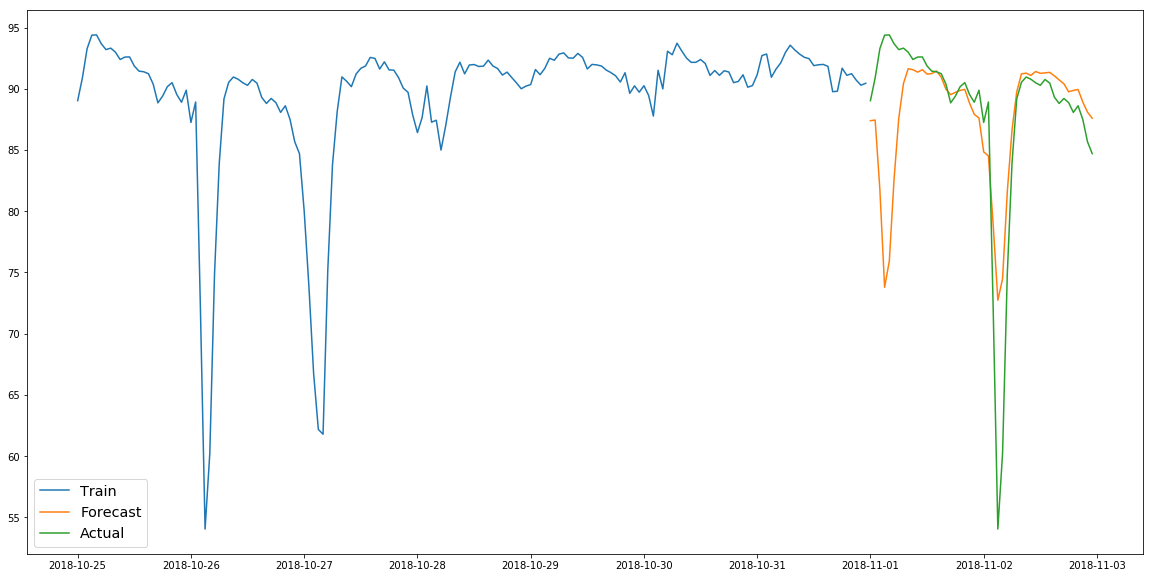

In [30]:
plot_forecasts(train, test, forecast)

## 4. NE_ID = MEXMTYMSS2

In [31]:
df1 = df.loc[df["ne_id"] == "MEXMTYMSS2" ].drop(columns = ["kpi_id", "kpi", "unit", "ne_id"]).reset_index().drop(columns = "index")

df1["ne_ts"] = pd.to_datetime(df1["ne_date"] + "-" + df1["ne_hour"].astype("str"), format="%Y-%m-%d-%H")
df1 = df1.drop(columns = ["ne_date", "ne_hour"])
df1 = df1.set_index("ne_ts")

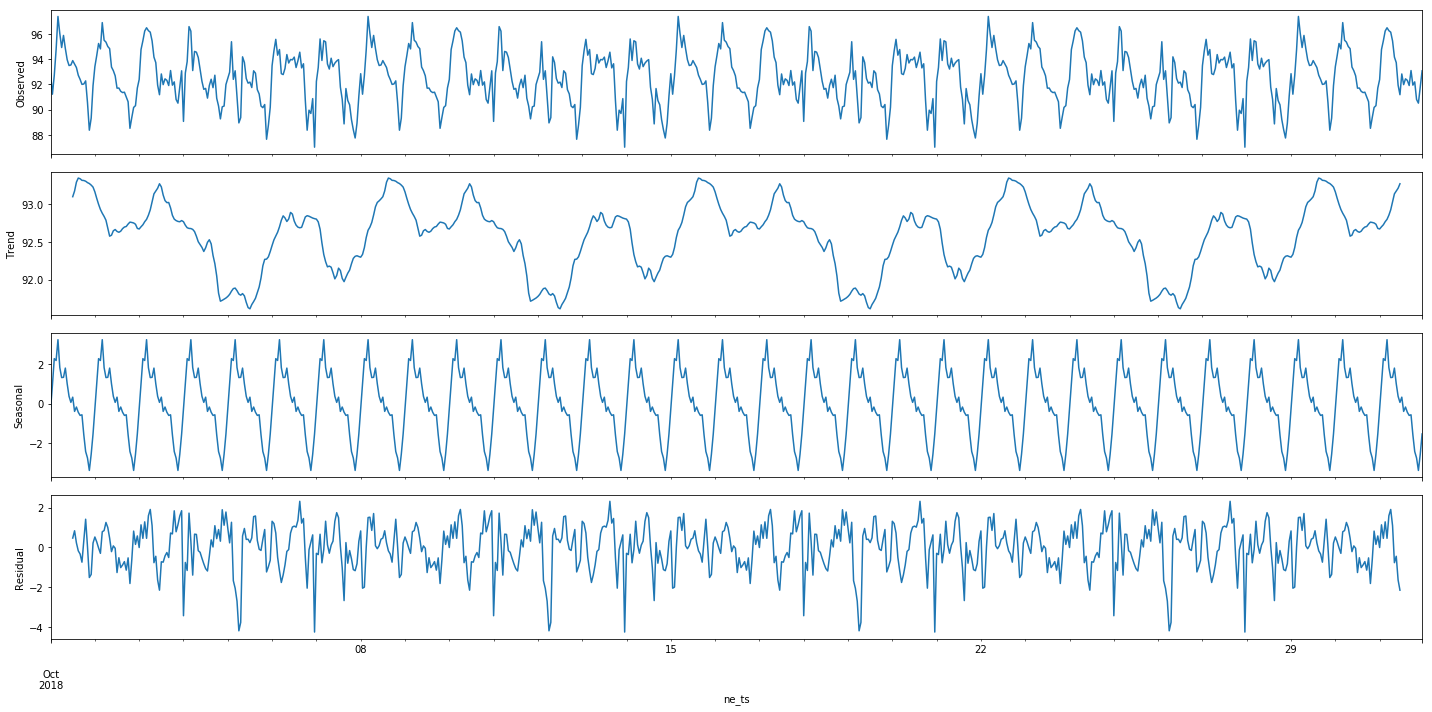

In [32]:
train = df1['2018-10']
test = df1['2018-11']

# Plot trend, seasonal and residual

decomposition = sm.tsa.seasonal_decompose(train, model='add')
fig = decomposition.plot()
plt.show()

### Baseline

In [33]:
np.sqrt(mean_squared_error([np.mean(train)]*48, test))

2.018963170658775

In [34]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

RMSE

In [35]:
results = mod.fit()
forecast = results.forecast(48)
np.sqrt(mean_squared_error(forecast[:48], test.values))

1.409855496595754

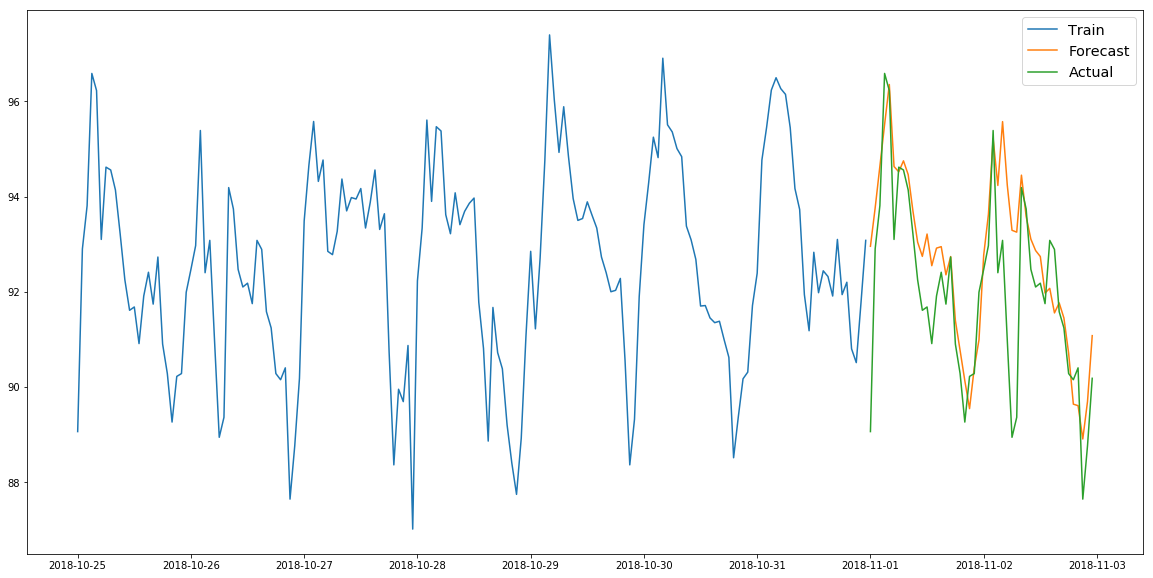

In [36]:
plot_forecasts(train, test, forecast)

## 5. NE_ID = MEXGDLMSS1

In [37]:
df1 = df.loc[df["ne_id"] == "MEXGDLMSS1" ].drop(columns = ["kpi_id", "kpi", "unit", "ne_id"]).reset_index().drop(columns = "index")

In [38]:
df1 = df.loc[df["ne_id"] == "MEXGDLMSS1" ].drop(columns = ["kpi_id", "kpi", "unit", "ne_id"]).reset_index().drop(columns = "index")

df1["ne_ts"] = pd.to_datetime(df1["ne_date"] + "-" + df1["ne_hour"].astype("str"), format="%Y-%m-%d-%H")
df1 = df1.drop(columns = ["ne_date", "ne_hour"])
df1 = df1.set_index("ne_ts")

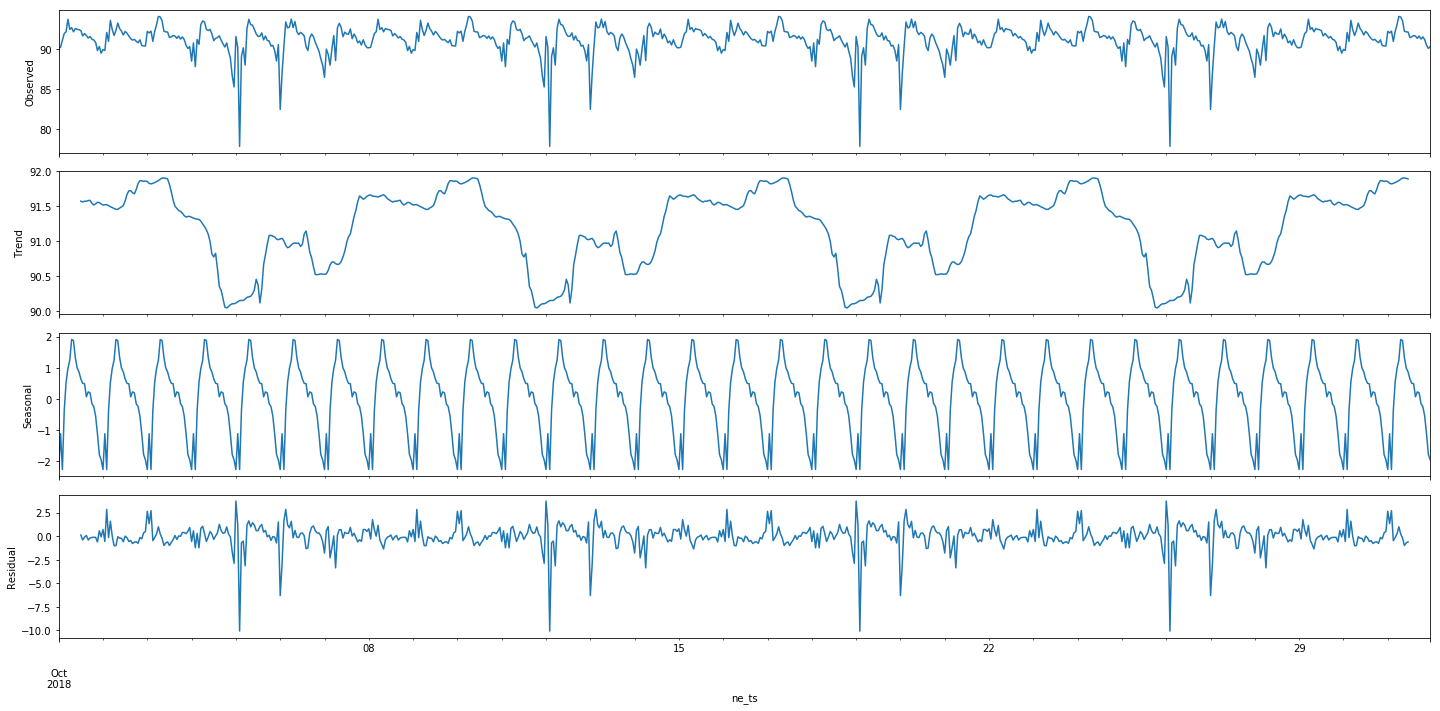

In [39]:
train = df1['2018-10']
test = df1['2018-11']

# Plot trend, seasonal and residual

decomposition = sm.tsa.seasonal_decompose(train, model='add')
fig = decomposition.plot()
plt.show()

### Baseline

In [40]:
np.sqrt(mean_squared_error([np.mean(train)]*48, test))

2.61876346183181

In [41]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

RMSE

In [42]:
results = mod.fit()
forecast = results.forecast(48)
np.sqrt(mean_squared_error(forecast[:48], test.values))

1.9066900284405206

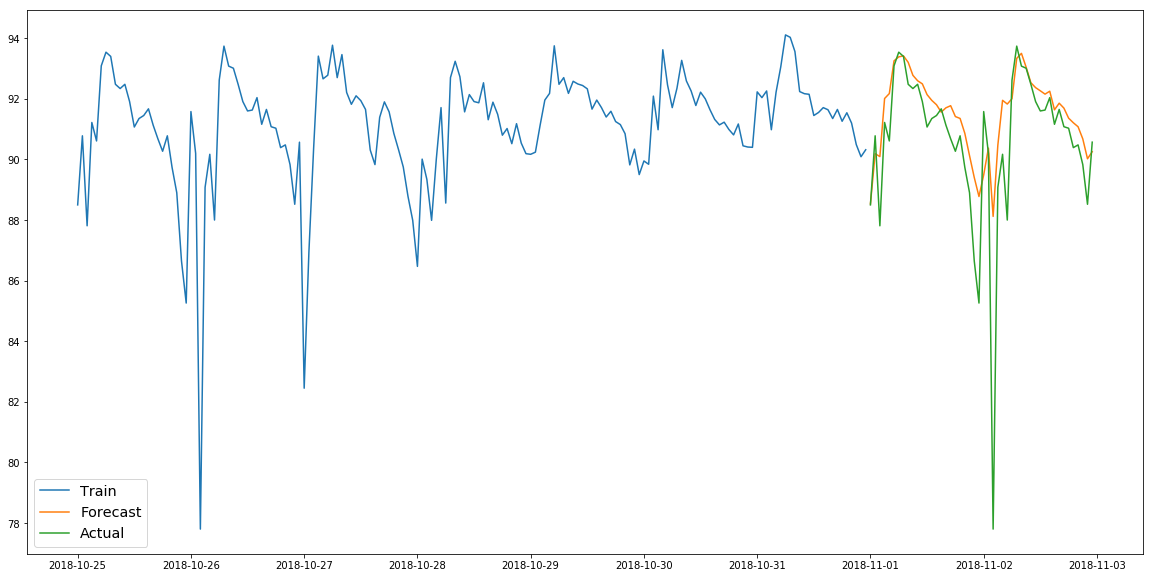

In [43]:
plot_forecasts(train, test, forecast)

## Grid search

In [24]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [25]:
p = d = q = range(1, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal, results.aic, mean_squared_error(results.forecast(48), test.values)))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 24) - AIC:3217.547788867684 - MSE:52.44916182150157
ARIMA(1, 1, 1)x(1, 1, 2, 24) - AIC:3052.6086833594945 - MSE:46.01293486911133
ARIMA(1, 1, 1)x(1, 2, 1, 24) - AIC:3501.2850641506784 - MSE:75.28951251562425
ARIMA(1, 1, 1)x(1, 2, 2, 24) - AIC:3108.097837853201 - MSE:56.392325960963284
ARIMA(1, 1, 1)x(2, 1, 1, 24) - AIC:3068.018633593674 - MSE:47.25090065367556
ARIMA(1, 1, 1)x(2, 1, 2, 24) - AIC:3018.94011045483 - MSE:41.35981921481787
ARIMA(1, 1, 1)x(2, 2, 1, 24) - AIC:3309.1068123140903 - MSE:70.62709604341462
ARIMA(1, 1, 1)x(2, 2, 2, 24) - AIC:3236.092971547325 - MSE:80.56607064397117
ARIMA(1, 1, 2)x(1, 1, 1, 24) - AIC:3131.250822869769 - MSE:44.78000499513752
ARIMA(1, 1, 2)x(1, 1, 2, 24) - AIC:2976.818224670042 - MSE:36.377954588540085
ARIMA(1, 1, 2)x(1, 2, 1, 24) - AIC:3428.6225382901657 - MSE:75.85474741806259
ARIMA(1, 1, 2)x(1, 2, 2, 24) - AIC:3038.0037310294892 - MSE:50.42097325137328
ARIMA(1, 1, 2)x(2, 1, 1, 24) - AIC:3003.2787285475642 - MSE:41.6872485

ARIMA(0, 0, 0)x(2, 1, 2, 24)